In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

pd.options.display.max_columns = 999  # Allos us to display all columns
pd.options.display.max_rows = 999  # Allos us to display all columns

df_train = pd.read_csv('./datasets/cleaned_train3.csv',keep_default_na=False)
df_test = pd.read_csv('./datasets/cleaned_test3.csv')

df_train.columns = df_train.columns.str.lower() # column names to lower case
df_test.columns = df_test.columns.str.lower() # column names to lower case

In [2]:
df_train.head()

,1st flr sf,2nd flr sf,3ssn porch,bedroom abvgr,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage yr blt,gr liv area,half bath,heating qc,id,kitchen abvgr,kitchen qual,land slope,lot area,lot frontage,lot shape,low qual fin sf,ms subclass,mas vnr area,misc val,mo sold,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold,conditions,exteriors,alley_0,alley_1,alley_2,bldg type_1fam,bldg type_2fmcon,bldg type_duplex,bldg type_twnhs,bldg type_twnhse,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,garage type_2types,garage type_attchd,garage type_basment,garage type_builtin,garage type_carport,garage type_detchd,garage type_na,heating_gasa,heating_gasw,heating_grav,heating_othw,heating_wall,house style_1.5fin,house style_1.5unf,house style_1story,house style_2.5fin,house style_2.5unf,house style_2story,house style_sfoyer,house style_slvl,land contour_bnk,land contour_hls,land contour_low,land contour_lvl,lot config_corner,lot config_culdsac,lot config_fr2,lot config_fr3,lot config_inside,ms zoning_a (agr),ms zoning_c (all),ms zoning_fv,ms zoning_i (all),ms zoning_rh,ms zoning_rl,ms zoning_rm,mas vnr type_brkcmn,mas vnr type_brkface,mas vnr type_none,mas vnr type_stone,misc feature_elev,misc feature_gar2,misc feature_na,misc feature_othr,misc feature_shed,misc feature_tenc,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,roof matl_clytile,roof matl_compshg,roof matl_membran,roof matl_tar&grv,roof matl_wdshake,roof matl_wdshngl,roof style_flat,roof style_gable,roof style_gambrel,roof style_hip,roof style_mansard,roof style_shed,sale type_cod,sale type_cwd,sale type_con,sale type_conld,sale type_conli,sale type_conlw,sale type_new,sale type_oth,sale type_wd
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,1,5,0,3,4,10,12,0,0,0,2,8,475.0,2.0,3,2,3,1976.0,1479,1,5,109,1,4,3,13517,55.228571,3,0,60,289.0,0,3,44,8,6,533352170,2,0,0,130500,0,1,6,725.0,4,0,1976,2005,2010,1,22,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,1,1,5,0,3,4,13,14,0,3,1,2,8,559.0,2.0,3,2,3,1997.0,2122,1,5,544,1,4,3,11492,43.000000,3,0,60,132.0,0,4,74,5,7,531379050,2,0,0,220000,0,1,8,913.0,4,0,1996,1997,2009,2,27,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1057,0,0,3,3,1,1.0,0.0,3,326.0,731.0,0.0,6,1,1,1,1,5,0,4,3,13,14,0,0,0,1,8,246.0,1.0,3,1,3,1953.0,1057,0,3,153,1,4,3,7922,68.000000,4,0,20,0.0,0,1,52,7,5,535304180,2,0,0,109000,0,1,5,1057.0,4,0,1953,2007,2010,2,27,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0

In [3]:
df_train.corr()[['saleprice']].sort_values(['saleprice'], 
                                           ascending=False
                                          ).head(40) # gives you everything corelated to apps

,saleprice
saleprice,1.000000
overall qual,0.800207
exter qual,0.712146
gr liv area,0.697038
kitchen qual,0.692336
garage area,0.649897
garage cars,0.647781
total bsmt sf,0.629303
1st flr sf,0.618486
bsmt qual,0.612188


In [4]:
df_train.corr()[['saleprice']].abs().sort_values(['saleprice'], ascending=False).index.tolist() # gives you everything corelated to apps

['saleprice',
 'overall qual',
 'exter qual',
 'gr liv area',
 'kitchen qual',
 'garage area',
 'garage cars',
 'total bsmt sf',
 '1st flr sf',
 'bsmt qual',
 'year built',
 'garage finish',
 'year remod/add',
 'garage yr blt',
 'fireplace qu',
 'full bath',
 'foundation_pconc',
 'totrms abvgrd',
 'mas vnr area',
 'fireplaces',
 'heating qc',
 'neighborhood_nridght',
 'bsmtfin sf 1',
 'exteriors',
 'exterior 1st',
 'mas vnr type_none',
 'bsmt exposure',
 'exterior 2nd',
 'garage type_detchd',
 'sale type_new',
 'garage type_attchd',
 'foundation_cblock',
 'bsmtfin type 1',
 'open porch sf',
 'wood deck sf',
 'lot frontage',
 'mas vnr type_stone',
 'lot area',
 'lot shape',
 'paved drive',
 'garage qual',
 'bsmt full bath',
 'half bath',
 'ms zoning_rm',
 'central air',
 'roof style_hip',
 'garage cond',
 'neighborhood_noridge',
 'mas vnr type_brkface',
 'neighborhood_stonebr',
 'pid',
 'roof style_gable',
 '2nd flr sf',
 'electrical',
 'ms zoning_rl',
 'garage type_na',
 'foundation_br

In [5]:
df_train.corr()[['saleprice']].sort_values(['saleprice'], ascending=True).head(40) # gives you everything corelated to apps

,saleprice
mas vnr type_none,-0.411170
garage type_detchd,-0.370344
foundation_cblock,-0.355535
lot shape,-0.294542
ms zoning_rm,-0.281951
pid,-0.255052
roof style_gable,-0.249329
garage type_na,-0.230990
foundation_brktil,-0.229891
sale type_wd,-0.212542


<AxesSubplot:>

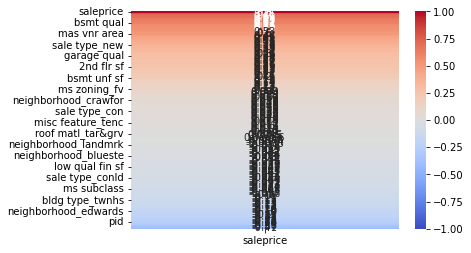

In [6]:
sns.heatmap(df_train.corr()[['saleprice']].sort_values('saleprice', ascending=False),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1)

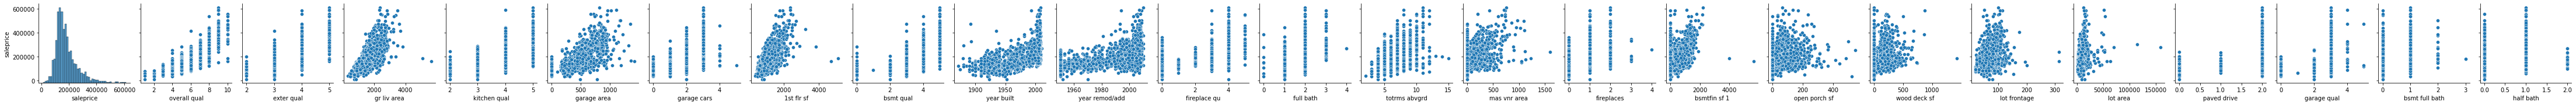

In [7]:
sns.pairplot(df_train, x_vars=[
    'saleprice','overall qual','exter qual',
    'gr liv area','kitchen qual','garage area',
    'garage cars','1st flr sf','bsmt qual',
    'year built','year remod/add','fireplace qu',
    'full bath','totrms abvgrd','mas vnr area',
    'fireplaces','bsmtfin sf 1','open porch sf',
    'wood deck sf','lot frontage','lot area',
    'paved drive','garage qual','bsmt full bath','half bath'], y_vars=['saleprice'])   # specifying axis
# apps is out target so thats why we're looking at it

In [8]:
##################################################
##############   Looking for interactions  #######
##################################################

In [9]:
df_train.head()

,1st flr sf,2nd flr sf,3ssn porch,bedroom abvgr,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage yr blt,gr liv area,half bath,heating qc,id,kitchen abvgr,kitchen qual,land slope,lot area,lot frontage,lot shape,low qual fin sf,ms subclass,mas vnr area,misc val,mo sold,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold,conditions,exteriors,alley_0,alley_1,alley_2,bldg type_1fam,bldg type_2fmcon,bldg type_duplex,bldg type_twnhs,bldg type_twnhse,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,garage type_2types,garage type_attchd,garage type_basment,garage type_builtin,garage type_carport,garage type_detchd,garage type_na,heating_gasa,heating_gasw,heating_grav,heating_othw,heating_wall,house style_1.5fin,house style_1.5unf,house style_1story,house style_2.5fin,house style_2.5unf,house style_2story,house style_sfoyer,house style_slvl,land contour_bnk,land contour_hls,land contour_low,land contour_lvl,lot config_corner,lot config_culdsac,lot config_fr2,lot config_fr3,lot config_inside,ms zoning_a (agr),ms zoning_c (all),ms zoning_fv,ms zoning_i (all),ms zoning_rh,ms zoning_rl,ms zoning_rm,mas vnr type_brkcmn,mas vnr type_brkface,mas vnr type_none,mas vnr type_stone,misc feature_elev,misc feature_gar2,misc feature_na,misc feature_othr,misc feature_shed,misc feature_tenc,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,roof matl_clytile,roof matl_compshg,roof matl_membran,roof matl_tar&grv,roof matl_wdshake,roof matl_wdshngl,roof style_flat,roof style_gable,roof style_gambrel,roof style_hip,roof style_mansard,roof style_shed,sale type_cod,sale type_cwd,sale type_con,sale type_conld,sale type_conli,sale type_conlw,sale type_new,sale type_oth,sale type_wd
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,1,5,0,3,4,10,12,0,0,0,2,8,475.0,2.0,3,2,3,1976.0,1479,1,5,109,1,4,3,13517,55.228571,3,0,60,289.0,0,3,44,8,6,533352170,2,0,0,130500,0,1,6,725.0,4,0,1976,2005,2010,1,22,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,1,1,5,0,3,4,13,14,0,3,1,2,8,559.0,2.0,3,2,3,1997.0,2122,1,5,544,1,4,3,11492,43.000000,3,0,60,132.0,0,4,74,5,7,531379050,2,0,0,220000,0,1,8,913.0,4,0,1996,1997,2009,2,27,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1057,0,0,3,3,1,1.0,0.0,3,326.0,731.0,0.0,6,1,1,1,1,5,0,4,3,13,14,0,0,0,1,8,246.0,1.0,3,1,3,1953.0,1057,0,3,153,1,4,3,7922,68.000000,4,0,20,0.0,0,1,52,7,5,535304180,2,0,0,109000,0,1,5,1057.0,4,0,1953,2007,2010,2,27,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0

In [10]:
# df_train['bsmt cond'] * df_train['bsmt exposure']
#     df_train['bsmt full bath']
#     df_train['bsmt qual']
#     df_train['bsmt unf sf']
#     df_train['bsmtfin sf 1']
#     df_train['bsmtfin sf 2']

In [11]:
# df_train['garage area * df_train['garage cars']
#     df_train['garage cond']
#     df_train['garage finish']
#     df_train['garage qual']

In [12]:
# df_train['land slope * df_train['lot shape']
#     df_train['lot area']
#     df_train['lot frontage']

In [13]:
df_corr_test = df_train
df_corr_test.dtypes

1st flr sf                int64
2nd flr sf                int64
3ssn porch                int64
bedroom abvgr             int64
bsmt cond                 int64
bsmt exposure             int64
bsmt full bath          float64
bsmt half bath          float64
bsmt qual                 int64
bsmt unf sf             float64
bsmtfin sf 1            float64
bsmtfin sf 2            float64
bsmtfin type 1            int64
bsmtfin type 2            int64
central air               int64
condition 1               int64
condition 2               int64
electrical                int64
enclosed porch            int64
exter cond                int64
exter qual                int64
exterior 1st              int64
exterior 2nd              int64
fence                     int64
fireplace qu              int64
fireplaces                int64
full bath                 int64
functional                int64
garage area             float64
garage cars             float64
garage cond               int64
garage f

In [14]:
# import itertools
# list_test = [
#      'overall qual',
#  'exter qual',
#  'gr liv area',
#  'kitchen qual',
#  'garage area',
#  'garage cars',
#  'total bsmt sf',
#  '1st flr sf',
#  'bsmt qual',
#  'year built',
#  'garage finish',
#  'year remod/add',
#  'fireplace qu',
#  'full bath',

# # ]
    
# list_test = list(df_train.columns.values.tolist())


corr = 0


for i in df_train:  
    for j in df_train:  
        if i != j and i != 'saleprice' and j != 'saleprice':
            df_corr_test['test'] = df_corr_test[j] * df_corr_test[i]
            abs_corr = abs(df_corr_test['test'].corr(df_corr_test['saleprice']))
            if abs_corr > .8:
                if abs(df_corr_test[j].corr(df_corr_test['saleprice'])) < abs_corr and abs(df_corr_test[j].corr(df_corr_test['saleprice'])) < abs_corr:
                    print(f"{j} * {i}corr to SP: {abs_corr} vs {abs(df_corr_test[j].corr(df_corr_test['saleprice']))} : {abs(df_corr_test[i].corr(df_corr_test['saleprice']))} ")
            # else:
            #     del df_corr_test[df_corr_test.columns[-1]]
            
            
#            print(f'{df_corr_test[f" {i} times {j}"]} corr to SP: {abs_corr}')
            
            
#             if abs_corr > .5:
#                 print(f" {i} times {j} : {abs_corr}")
#             else:
#                 del df_corr_test[df_corr_test.columns[-1]]
            

df_corr_test.head()

gr liv area * bsmt qualcorr to SP: 0.8142058397766709 vs 0.6970384443056636 : 0.6121879016004271 
overall qual * bsmt qualcorr to SP: 0.8122018370392814 vs 0.8002068702531371 : 0.6121879016004271 
gr liv area * exter qualcorr to SP: 0.8179327785014787 vs 0.6970384443056636 : 0.7121457238137736 
overall qual * exter qualcorr to SP: 0.8283029263883814 vs 0.8002068702531371 : 0.7121457238137736 
overall qual * garage areacorr to SP: 0.813247327825709 vs 0.8002068702531371 : 0.6498968496618993 
overall qual * garage carscorr to SP: 0.8199346784699413 vs 0.8002068702531371 : 0.6477813459587386 
overall qual * garage yr bltcorr to SP: 0.8059406501040538 vs 0.8002068702531371 : 0.550323768657308 
bsmt qual * gr liv areacorr to SP: 0.8142058397766709 vs 0.6121879016004271 : 0.6970384443056636 
exter qual * gr liv areacorr to SP: 0.8179327785014787 vs 0.7121457238137736 : 0.6970384443056636 
kitchen qual * gr liv areacorr to SP: 0.8122932549886317 vs 0.6923363531071033 : 0.6970384443056636 
ove

,1st flr sf,2nd flr sf,3ssn porch,bedroom abvgr,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage yr blt,gr liv area,half bath,heating qc,id,kitchen abvgr,kitchen qual,land slope,lot area,lot frontage,lot shape,low qual fin sf,ms subclass,mas vnr area,misc val,mo sold,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold,conditions,exteriors,alley_0,alley_1,alley_2,bldg type_1fam,bldg type_2fmcon,bldg type_duplex,bldg type_twnhs,bldg type_twnhse,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,garage type_2types,garage type_attchd,garage type_basment,garage type_builtin,garage type_carport,garage type_detchd,garage type_na,heating_gasa,heating_gasw,heating_grav,heating_othw,heating_wall,house style_1.5fin,house style_1.5unf,house style_1story,house style_2.5fin,house style_2.5unf,house style_2story,house style_sfoyer,house style_slvl,land contour_bnk,land contour_hls,land contour_low,land contour_lvl,lot config_corner,lot config_culdsac,lot config_fr2,lot config_fr3,lot config_inside,ms zoning_a (agr),ms zoning_c (all),ms zoning_fv,ms zoning_i (all),ms zoning_rh,ms zoning_rl,ms zoning_rm,mas vnr type_brkcmn,mas vnr type_brkface,mas vnr type_none,mas vnr type_stone,misc feature_elev,misc feature_gar2,misc feature_na,misc feature_othr,misc feature_shed,misc feature_tenc,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,roof matl_clytile,roof matl_compshg,roof matl_membran,roof matl_tar&grv,roof matl_wdshake,roof matl_wdshngl,roof style_flat,roof style_gable,roof style_gambrel,roof style_hip,roof style_mansard,roof style_shed,sale type_cod,sale type_cwd,sale type_con,sale type_conld,sale type_conli,sale type_conlw,sale type_new,sale type_oth,sale type_wd,test
0,725,754,0,3,3,1,0.0,0.0,3,192.0,533.0,0.0,6,1,1,0,1,5,0,3,4,10,12,0,0,0,2,8,475.0,2.0,3,2,3,1976.0,1479,1,5,109,1,4,3,13517,55.228571,3,0,60,289.0,0,3,44,8,6,533352170,2,0,0,130500,0,1,6,725.0,4,0,1976,2005,2010,1,22,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,913,1209,0,4,3,1,1.0,0.0,4,276.0,637.0,0.0,6,1,1,1,1,5,0,3,4,13,14,0,3,1,2,8,559.0,2.0,3,2,3,1997.0,2122,1,5,544,1,4,3,11492,43.000000,3,0,60,132.0,0,4,74,5,7,531379050,2,0,0,220000,0,1,8,913.0,4,0,1996,1997,2009,2,27,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1057,0,0,3,3,1,1.0,0.0,3,326.0,731.0,0.0,6,1,1,1,1,5,0,4,3,13,14,0,0,0,1,8,246.0,1.0,3,1,3,1953.0,1057,0,3,153,1,4,3,7922,68.000000,4,0,20,0.0,0,1,52,7,5,535304180,2,0,0,109000,0,1,5,1057.0,4,0,1953,2007,2010,2,27,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,

In [15]:
df_train['gr liv area']
df_train['bsmt qual']
df_train['overall qual']
df_train['exter qual']
df_train['garage area']
df_train['garage cars']
df_train['garage yr blt']
df_train['kitchen qual']
df_train['year built']
df_train['year remod/add']
df_train['yr sold']



df_train['gr liv area'] * df_train['bsmt qual']
df_train['overall qual'] * df_train['bsmt qual']
df_train['gr liv area'] * df_train['exter qual']
df_train['overall qual'] * df_train['exter qual']
df_train['overall qual'] * df_train['garage area']
df_train['overall qual'] * df_train['garage cars']
df_train['overall qual'] * df_train['garage yr blt']
df_train['kitchen qual'] * df_train['gr liv area'] 
df_train['overall qual'] * df_train['gr liv area'] 
df_train['overall qual'] * df_train['kitchen qual'] 
df_train['year built'] * df_train['overall qual']
df_train['year remod/add'] * df_train['overall qual']
df_train['yr sold'] * df_train['overall qual']



0       12030
1       13979
2       10035
3       10035
4       11958
        ...  
2046    16056
2047     7800
2048    11700
2049     7824
2050    13993
Length: 2051, dtype: int64

In [ ]:
df_train['gr liv area']
df_train['bsmt qual']
df_train['overall qual']
df_train['exter qual']
df_train['garage area']
df_train['garage cars']
df_train['garage yr blt']
df_train['kitchen qual']
df_train['year built']
df_train['year remod/add']
df_train['yr sold']